In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [3]:
df = pd.read_csv('Advertising.csv.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
print('Rows ---->',df.shape[0])
print('column --->',df.shape[1])

Rows ----> 200
column ---> 5


In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [8]:
df.size

1000

In [10]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df[:2]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [13]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


ValueError: Dimensions of labels and X must be compatible

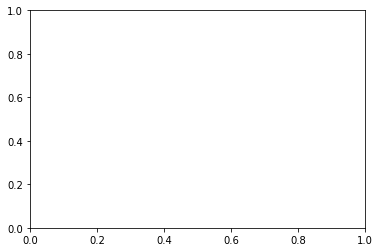

In [16]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

In [15]:
df[:5]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


's'

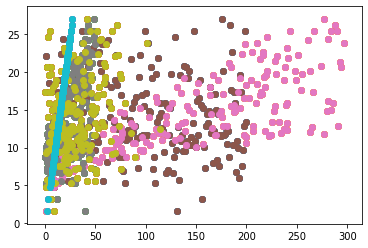

In [17]:
def sc():
    l=df.columns
    for i in range(len(l)-1):
        for j in l:
            s = plt.scatter(j,'Sales',data=df)
    return 's'
sc()

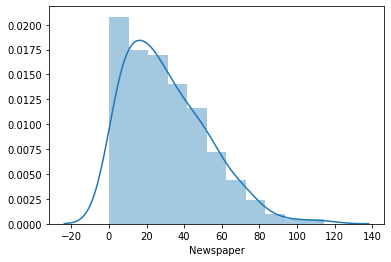

In [18]:
sns.distplot(df['Newspaper'])

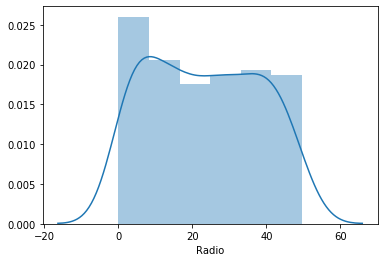

In [19]:
sns.distplot(df['Radio'])

In [20]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [21]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
y = df.iloc[:,-1:]

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=43)

In [24]:
xtrain,ytrain

(        TV  Radio  Newspaper
 71   109.8   14.3       31.7
 90   134.3    4.9        9.3
 100  222.4    4.3       49.8
 44    25.1   25.7       43.3
 94   107.4   14.0       10.9
 ..     ...    ...        ...
 58   210.8   49.6       37.7
 21   237.4    5.1       23.5
 49    66.9   11.7       36.8
 64   131.1   42.8       28.9
 68   237.4   27.5       11.0
 
 [140 rows x 3 columns],      Sales
 71    12.4
 90    11.2
 100   11.7
 44     8.5
 94    11.5
 ..     ...
 58    23.8
 21    12.5
 49     9.7
 64    18.0
 68    18.9
 
 [140 rows x 1 columns])

In [25]:
xtest,ytest

(        TV  Radio  Newspaper
 56     7.3   28.1       41.4
 37    74.7   49.4       45.7
 67   139.3   14.5       10.2
 79   116.0    7.7       23.1
 80    76.4   26.7       22.3
 188  286.0   13.9        3.7
 183  287.6   43.0       71.8
 10    66.1    5.8       24.2
 128  220.3   49.0        3.2
 62   239.3   15.5       27.3
 65    69.0    9.3        0.9
 17   281.4   39.6       55.8
 133  219.8   33.5       45.1
 195   38.2    3.7       13.8
 146  240.1    7.3        8.7
 38    43.1   26.7       35.1
 173  168.4    7.1       12.8
 149   44.7   25.8       20.6
 93   250.9   36.5       72.3
 29    70.6   16.0       40.8
 0    230.1   37.8       69.2
 2     17.2   45.9       69.3
 122  224.0    2.4       15.6
 180  156.6    2.6        8.3
 95   163.3   31.6       52.9
 121   18.8   21.7       50.4
 185  205.0   45.1       19.6
 39   228.0   37.7       32.0
 66    31.5   24.6        2.2
 19   147.3   23.9       19.1
 11   214.7   24.0        4.0
 45   175.1   22.5       31.5
 41   177.

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()

In [27]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
ypred=model.predict(xtest)
ypred

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [29]:
model.score(xtrain,ytrain)*100

88.44142326775768

In [30]:
model.score(xtest,ytest)*100

92.20854203535252

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
mean_squared_error(ytest,ypred)

2.2412862530933464

In [33]:
mean_absolute_error(ytest,ypred)

1.2212299380899396

In [34]:
r2_score(ytest,ypred)*100

92.20854203535252

In [35]:
rmse = np.sqrt(mean_squared_error(ytest,ypred))
rmse

1.4970926000396056

In [36]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [37]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [39]:
scores=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(scores)
finalscore

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

0.8910650514774895

In [40]:
param_grid = {'normalize':['deprecated'],
    'copy_X':[True],
    'n_jobs':[-1,1,2,-2],
    'positive':[False],
    'fit_intercept':[True]
    }

In [41]:
grid_model=GridSearchCV(model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)
grid_model

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'normalize': ['deprecated'],
                         'positive': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
grid_model.estimator

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
grid_model.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'iid': 'warn',
 'n_jobs': -1,
 'param_grid': {'normalize': ['deprecated'],
  'copy_X': [True],
  'n_jobs': [-1, 1, 2, -2],
  'positive': [False],
  'fit_intercept': [True]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

# lasso

In [50]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.9204771495691686

In [52]:
lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
    'normalize':['deprecated'],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [53]:
grid_model_lasso=GridSearchCV(lasso,
    param_grid=lasso_grid_para,
    n_jobs=-1,
    cv=5)
grid_model_lasso

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
grid_model_lasso.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': False,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'iid': 'warn',
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'normalize': ['deprecated'],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None

In [55]:
grid_model_lasso.set_params()

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)